<center>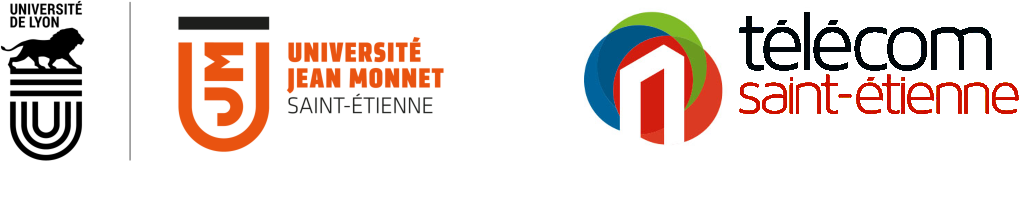</center>

<center><span style="font-size:35px"><b>Statistical Inference</b></span></center>

# The Italian Grand Prix

The Autodromo Nazionale di Monza, originally built in 1922, is one of the most famous race track in the world! Monza is called the "Temple of Speed" for a reason. Long straights combined with heavy braking zones and quick chicanes make this legendary track one of the calendar's best. Every year, all the racing teams are very excited to win the race. Appart from the glory, marking points at Monza is above all a great source of revenues from the sponsors. Ahead of your racing team, you decide to resort to statistical inference in order to design the perfect car setting for the circuit.

<br>
<center><img src="https://www.valiceblog.com/content/images/2021/09/Circuit-2.png" style="height:200px"></center>

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## 1. All About Speed

Monza is all about speed, and speed needs power. So, at this circuit more than any other, the work of F1's engine manufacturers is under greater scrutiny than at any other destination. This means that certain components such as pistons, cylinder heads and crankcases are placed under far greater stress than they are at lower-speed tracks with lower full-throttle loadings such as Monaco, for example.

Your engineers have come up with a new engine calibration. They claim that the "peak power is absolutely beautifully dialled in". According to their simulations, they expect an average time lap of 1'26.595 while, with the previous setup, it was about 1'26.958.

Your drivers try the new calibration. The following table recaps 30 laps (in seconds)

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 86.595 | 86.767 | 87.105 | 86.590 | 86.706 | 86.363 | 86.407 | 86.950 | 86.259 | 86.624 | 86.302 | 86.629 | 86.934 | 85.717 | 86.497 | 85.940 | 87.158 | 86.594 | 86.733 | 86.399 | 86.882 | 86.766 | 86.537 | 86.710 | 86.982 | 86.774 | 86.443 | 86.370 | 86.720 | 86.698 |

With 5\% risk, can you trust your engineers?

### 1.1. Visualizing the data 

(a) Put the data in a Numpy array

In [35]:
data = [86.595, 86.767, 87.105, 86.590, 86.706, 86.363, 86.407, 86.950, 86.259, 86.624, 86.302, 86.629, 86.934, 85.717, 86.497, 85.940, 87.158, 86.594, 86.733, 86.399, 86.882, 86.766, 86.537, 86.710, 86.982, 86.774, 86.443, 86.370, 86.720, 86.698]

In [36]:
data = np.array(data)

(b) Compute the mean and standard deviation. Make sure to use the unbiased estimator of the standard deviation.

In [37]:
mean = np.mean(data)

# Version 1 : Remove one degree of freedom to yield an unbiased estimate
std = np.std(data,ddof=1)

# Version 2 : Correct the biased estimate with the Bessel correction
std = np.sqrt(len(data)/(len(data)-1))*np.std(data)

print("The mean lap time is ", mean)
print("The standard deviation of lap times is ", std)

The mean lap time is  86.60503333333331
The standard deviation of lap times is  0.3120444799564073


(c) Plot the empirical probability density of your data. Comment and compare with a normal distribution by using the appropriate scipy.stats function. Try different values of `bins`.

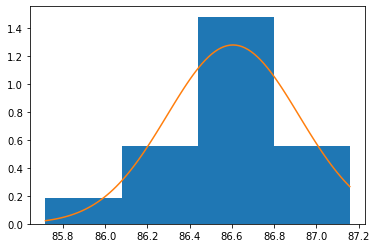

In [80]:
# Plot the histogram of your data
plt.hist(data, bins=4, density=True) 

# Plot the PDF (probability distribution function) of the normal distribution with mean=mean and std=std
durations = np.linspace( np.min(data), np.max(data), 100)
normal_pdf = stats.norm.pdf(durations, loc=mean, scale=std)

plt.plot(durations, normal_pdf)


### 1.2. Statistical test

(a) Describe your problems in statistical terms (population, sample, statistical trait, etc.)

(b) What are the hypotheses of your statistical test?

(c) Which statistical test do you recommend ? What is the associated test statistic? Explain.

(d) Compute the observed statistic and the rejection region by applying the course formula. Conclude the statistical test.

In [40]:
n = len(data)
m0 = 86.958
observed_stat = np.sqrt(n)*(mean - m0)/std
print("The observed test statistic is ", observed_stat)


critical_value_normal = stats.norm.ppf(0.05)
print("The rejection region is ]-∞,", critical_value_normal, "]")

print("Since the observed test statistic belongs to the rejection region, we reject the null hypothesis")

The observed test statistic is  -6.195520760622332
The rejection region is ]-∞, -1.6448536269514729 ]
Since the observed test statistic belongs to the rejection region, we reject the null hypothesis


(e) Read the documentation of the function `stats.ttest_1samp` in scipy.stats. What is the corresponding statistical test and test statistic? When can it be applied ? 

(f) Perform the statistical test with `stats.ttest_1samp`. What is the conclusion?

In [41]:
observed_stat_bis, pvalue = stats.ttest_1samp(data, popmean=86.958, alternative="less")
print("The observed test statistic is ", observed_stat_bis)
print("The pvalue reads ", pvalue)
print("Since the pvalue is smaller than alpha=0.05, we reject the null hypothesis")

The observed test statistic is  -6.195520760622332
The pvalue reads  4.6642460554579975e-07
Since the pvalue is smaller than alpha=0.05, we reject the null hypothesis


(g) Compare both the observed test statistics and rejection regions with the tesst done in question (e) and (f).

In [42]:
# Test statistic
print("The observed test statistic with the course formula is ", observed_stat)
print("The observed test statistic with the scipy.stats test is ", observed_stat_bis)

# Rejection region
critical_value_student = stats.t.ppf(0.05, df=29)
print("The rejection region with the Student distribution is ]-∞,", critical_value_student, "]")
print("The rejection region with the Normal distribution is ]-∞,", critical_value_normal, "]")


The observed test statistic with the course formula is  -6.195520760622332
The observed test statistic with the scipy.stats test is  -6.195520760622332
The rejection region with the Student distribution is ]-∞, -1.6991270265334977 ]
The rejection region with the Normal distribution is ]-∞, -1.6448536269514729 ]


(h) Conclude

## 2. The Legendary Sector 1

Sector 1 of Monza is where your top speed and brakes are tested to the limits. One of the biggest stops of the calendar is into Turn 1 and it is the only time you hit the brakes in this sector.

Your engineering team has come up with a new prototype for the braking system. However, producing couple units before the deadline will be very costly. So before comitting to a decision, you ask your reserve drivers to try the prototype. After couple of runs, you end up with the following Sector 1 times


| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Current system | 27.302 | 27.403 | 26.717 | 27.045 | 27.731 | 27.044 | 27.325 | 27.753 | 27.901 | 26.806 | 27.070 | 27.565 | 27.494 |
| Prototype | 27.115 | 27.779 | 27.350 | 27.434 | 27.401 | 26.964 | 26.865 | 27.275 | 27.108 | 27.593 | 46.779 | | |

You have been told by your data scientists that the data follows a normal distribution. However, your don't know how to prove it. At this moment, you regret not listening enough to the Statistical Inference course taught at Telecom Saint-Etienne... So you will have to trust them!

Your financial advisor suggest to take a 5% risk in building the new units if there is an improvement.

### 2.1. Visualizing the data

(a) Illustrate the data in various ways. What do you observe?

In [43]:
current = [27.302, 27.403, 26.717, 27.045, 27.731, 27.044, 27.325, 27.753, 27.901, 26.806, 27.070, 27.565, 27.494]
prototype = [27.115, 27.779, 27.350, 27.434, 27.401, 26.964, 26.865, 27.275, 27.108, 27.593, 46.779]

Text(0.5, 1.0, 'Prototype')

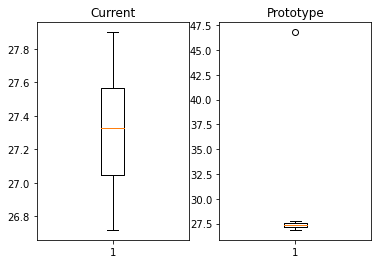

In [44]:
plt.subplot(121)
plt.boxplot(current)
plt.title("Current")
plt.subplot(122)
plt.boxplot(prototype)
plt.title("Prototype")

# There is an abnormal value

(b) Apply your recommendation.

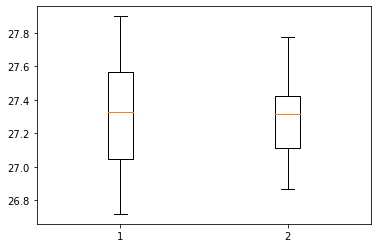

In [45]:
# Remove the last value which is anormal (I guess the driver missed the turn)
prototype = prototype[:-1]
_ = plt.boxplot([current, prototype]);


### 2.2. Statistical test

(a) Describe your problems in statistical terms (population, sample, statistical trait, etc.)

(b) What are the hypotheses of your statistical test?

(c) How would you solve this statistical test? Explain all the steps.

(d) Solve the statistical test by comparing the observed test statistic and the rejection region. Explain your reasonning.

In [66]:
# TEST OF HOMOGENEITY OF VARIANCE
print("TEST OF HOMOGENEITY OF VARIANCE")

# Computing Fisher test statistic
n1 = len(current)
n2 = len(prototype)
s1 = np.std(current, ddof=1)
s2 = np.std(prototype, ddof=2)
stat_fisher = s1**2 / s2**2 
print("Observed fisher's test statistic:" + str(stat_fisher))

# Computing the rejection region (bilateral test with splitting of alpha=0.05 in two)
c_critical_fisher_right = stats.f.ppf(0.975, n1-1, n2-1)
c_critical_fisher_left = stats.f.ppf(0.025, n1-1, n2-1)
print("Rejection region: [0," + str(c_critical_fisher_left) + "]U[" + str(c_critical_fisher_right) + ",∞[")

# Conclusion
equal_var = (stat_fisher > c_critical_fisher_left) & (stat_fisher < c_critical_fisher_right)
if equal_var:
    print("We retain H0 -> equal variances")
else:
    print("We reject H0 -> different variances")

    
    
# TEST OF HOMOGENEITY OF MEAN
print("\nTEST OF HOMOGENEITY OF MEAN")
m1 = np.mean(current)
m2 = np.mean(prototype)
sp = np.sqrt( ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) )
stat_student = (m1-m2)/(sp*np.sqrt(1/n1 + 1/n2))
print("Observed fisher's test statistic:" + str(stat_fisher))

# Computing the rejection region (unilateral test on the right since m1>m2)
c_critical_student = stats.t.ppf(0.95, n1+n2-2)
print("Rejection region: [" + str(c_critical_student) + ",∞[")

# Conclusion
equal_mean = (stat_student < c_critical_student)
if equal_mean:
    print("We retain H0 -> the mean lap time is the same with the current or prototype braking systems")
else:
    print("We reject H0 -> the mean lap time with the prototype is smaller than with the current braking system")

TEST OF HOMOGENEITY OF VARIANCE
Observed fisher's test statistic:1.5158982936005314
Rejection region: [0,0.29104916350617555]U[3.8682203228432703,∞[
We retain H0 -> equal variances

TEST OF HOMOGENEITY OF MEAN
Observed fisher's test statistic:1.5158982936005314
Rejection region: [1.7207429028118775,∞[
We retain H0 -> the mean lap time is the same with the current or prototype braking systems


(e) Redo the statistical test but resort exclusively to the statistical tests available in *scipy.stats*, instead. If some test statistic are not available, justify why you can use a different one.

In [72]:
# Test of homogeneity of variance with scipy.stats.levene (remark: Fisher is not implemented)
# We have seen in the course that Levene is also appropriate
obs_stat_var, pvalue_var = stats.levene(current, prototype)
equal_var_v2  = pvalue_var > 0.05
if equal_var_v2:
    print("We retain H0 -> equal variances")
else:
    print("We reject H0 -> different variances")

# Test homogeneity of mean with scipy.stats.ttest_ind (with parameter equal_val and alternative to precise)
obs_stat_mean, pvalue_mean = stats.ttest_ind(current, prototype, equal_var=equal_var_v2, alternative="less")
equal_mean_v2 = pvalue_mean > 0.05
if equal_mean_v2:
    print("We retain H0 -> the mean lap time is the same with the current or prototype braking systems")
else:
    print("We reject H0 -> the mean lap time with the prototype is smaller than with the current braking system")

We retain H0 -> equal variances
We retain H0 -> the mean lap time is the same with the current or prototype braking systems


(f) Comment on the results of questions (d) and (e).

## 3. Variante Ascari

Sector 3 sounds theoretically simple. But it is anything but simple to extract all the lap time out of these technical high-speed sections. It contains the famous Ascari Chicane and the mighty Parabolica to finish the lap. The most difficult turn is turn 9. Drivers must make sure to hold 70%-80% throttle whilst on the kerb and only go full throttle when coming off the kerb to avoid uneven power delivery and a potential spin.

One of your driver has become too confident after his last free practice session. He his certain that he can go full throttle on the kerb without spinning. Over the years, you have kept a record of all the times drivers have spinned (or not) at turn 9. All the data in stored in your file *spinning.csv*

With 5% risk, are drivers going full throttle on the kerb more likely to spin?

### 3.1. Exploiting the data

(a) Load *spinning.csv* using the csv library. Take a look at the documentation and comment all your steps

In [73]:
import csv
with open("spinning.csv") as csvfile:
    spinner = csv.reader(csvfile,delimiter=',',quoting=csv.QUOTE_NONNUMERIC)
    data_spin = [data for data in spinner]
data_spin = np.array(data_spin)

(b) Clean the data. You might require to use the function *np.isnan* from the numpy library

In [74]:
print(data_spin.shape)
full_throttle = data_spin[0,:]
seventyfive_throttle = data_spin[1,:]

# The full throttle is indeed in the first line (data_spin[0,:]) since there are 250 non nan values
print(np.sum(~np.isnan(full_throttle)))
print(np.sum(~np.isnan(seventyfive_throttle)))

# Clean the nans value
full_throttle = full_throttle[~np.isnan(full_throttle)]

(2, 1000)
250
1000


(c) Fill the following table

| Group | Number who have spinned | Number of drivers |
| --- | --- | --- |
| Full throttle | ? | 250 |
| 75\% throttle | ? | 1000 |

In [75]:
print("Number who have spinned on full throttle: " + str(np.sum(full_throttle)))
print("Number who have spinned on 75% throttle: " + str(np.sum(seventyfive_throttle)))

Number who have spinned on full throttle: 16.0
Number who have spinned on 75% throttle: 16.0


### 3.2. Statistical test

(a) Describe your problems in statistical terms (population, sample, statistical trait, etc.)

(b) What are the hypotheses of your statistical test?

(c) Which test(s) statistic do you recommend? Explain.

(d) Use scipy to decide wether to accept or reject the null hypothesis

In [76]:
n1 = 250
n2 = 1000
p1 = np.sum(full_throttle) / n1
p2 = np.sum(seventyfive_throttle) / n2
p = (n1*p1 + n2*p2) / (n1+n2)

proportion_stat = (p1-p2)/np.sqrt( p*(1-p)*(1/n1 + 1/n2))
print(proportion_stat)

# Unilateral test where H1: p1>p2 so p1-p2>0 so the error is on the right
c_critical_normal = stats.norm.ppf(0.95)
print(c_critical_normal)

if proportion_stat > c_critical_normal:
    print("We reject H0: p1>p2. The driver should avoid going full throttle")
else:
    print("We retain H0: p1=p2. The driver can go full throttle")

4.298011912959396
1.6448536269514722
We reject H0: p1>p2. The driver should avoid going full throttle


## 4. Getting to Know the Competitors

Your engineer has compiled the lap time comparison of the Italian GP in FP1 from 2022 vs 2021:

| Lap time difference | Team |
| --- | --- |
| +0.437s | Williams |
| +0.496s | Ferrari |
| +0.561s | Haas |
| +1.124s | Alfa Romeo |
| +1.149s | Alpine |
| +1.462s | Red Bull |
| +1.508s | McLaren |
| +1.541s | AlphaTauri |
| +1.763s | Mercedes |
| +2.012s | Aston Martin |

He is ready to bet his engineer position that, with 5\% risk, there is an average difference of 1s in lap time. You take the bet!

In [78]:
# We are facing a paired sample test on the mean
# Initially we had X1 and X2, but we are provided with the difference X1-X2

# H0: The average lap time difference D is not significant
# H1: The average lap time difference D is greater than 1s

# We assume the the statistical trait (lap time) follows a normal distribution
# Statistical test: sqrt(n)*(Dmean - 1)/S_D follows a Student distribution with n-1 degrees of freedom
data_laptime = np.array([0.437, 0.496, 0.561, 1.124, 1.149, 1.462, 1.508, 1.541, 1.763, 2.012])
n = len(data_laptime)
d_mean = np.mean(data_laptime)
d_std = np.std(data_laptime) * np.sqrt(n/(n-1)) # Bessel correction


test_statistic = np.sqrt(n)*(d_mean - 1)/d_std
print(test_statistic)

# The error is on the right hand since
c_critical_laptime = stats.t.ppf(0.95,df=n-1)
print(c_critical_laptime)

if test_statistic > c_critical_laptime:
    print("We reject H0: there is an average difference of 1s in lap time")
else:
    print("We retain H0: there is not an average difference of 1s in lap time")

1.1744102850154534
1.8331129326536335
We retain H0: there is not an average difference of 1s in lap time
